In [68]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Regression Libraries libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

# Other ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


#seaborn theme
sns.set_theme(style="whitegrid")

In [2]:
KC = pd.read_csv('http://bit.ly/KCHouseDataset')
KC

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# Predicting price of a house given the features outlined

KC.shape

(21613, 21)

In [6]:
# We'll work with like 18 features
KC.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
KC.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
#Will first do linear regression and compare its RMSE score to Lasso reg

In [69]:
X = KC[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = KC['price']

In [57]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [70]:
# Will need to scale the features in X

scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [66]:
# Prediction via Linear Regression
linear_reg = LinearRegression()

linear_reg.fit(X, y)

print('RMSE of linear Regressor is : ', np.sqrt(metrics.mean_squared_error(y, (linear_reg.predict(X)))))

RMSE of linear Regressor is :  201163.90222277152


In [ ]:
# Get the alpha


In [72]:
# Prediction via Lasso Regression

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X, y)

print('Lasso Score', lasso.score(X, y))
print('RMSE of lasso Regressor is : ', np.sqrt(metrics.mean_squared_error(y, (lasso.predict(X)))))


Lasso Score 0.699747121532034
RMSE of lasso Regressor is :  201163.9248275797


/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27286864128213.5, tolerance: 291291676192.12994
  model = cd_fast.enet_coordinate_descent(


In [85]:
lasso2 = Lasso(normalize=True)
#Setting parameters
gridlasso =GridSearchCV(estimator=lasso2, param_grid = {'alpha' : np.logspace(-1, 5, 1) }, scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)

gridlasso.fit(X, y)
gridlasso.best_params_

/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24270399864513.625, tolerance: 260004851035.958
  model = cd_fast.enet_coordinate_descent(
/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23692972883932.5, tolerance: 257092287072.8853
  model = cd_fast.enet_coordinate_descent(
/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25053308206726.875, tolerance: 266184745178.01202
  model = cd_fast.enet_coordinate_descent(
/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/s

{'alpha': 0.1}

In [82]:
new_lasso = Lasso(normalize=True, alpha=0.1)
new_lasso.fit(X, y)

print('Lasso Score', new_lasso.score(X, y))
print('RMSE of lasso Regressor is : ', np.sqrt(metrics.mean_squared_error(y, (new_lasso.predict(X)))))

Lasso Score 0.699747121532034
RMSE of lasso Regressor is :  201163.9248275797


/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27286864128213.5, tolerance: 291291676192.12994
  model = cd_fast.enet_coordinate_descent(


In [62]:
comparison_df = pd.DataFrame({'Actual' : y, 'Predicted Values ' : (lasso.predict(X))})
comparison_df

,Actual,Predicted Values
0,221900.0,209025.668722
1,538000.0,734025.112841
2,180000.0,380220.792152
3,604000.0,454975.698503
4,510000.0,441007.874048
...,...,...
21608,360000.0,483035.488692
21609,400000.0,438618.324358
21610,402101.0,143611.513312
21611,400000.0,385297.306984


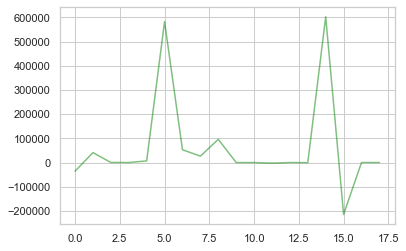

In [65]:
plt.plot(lasso.coef_, alpha=0.5, markersize=7, color='green')

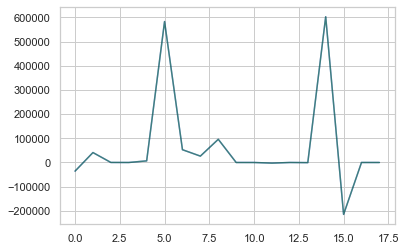

In [67]:
plt.plot(linear_reg.coef_, alpha=0.5, markersize=7, color='blue')
plt.plot(lasso.coef_, alpha=0.5, markersize=7, color='green')

In [73]:
lasso.coef_

array([-33247.08482047,  31590.57768709, 227447.92201509,   5278.93881035,
         3608.41215274,  50423.85929718,  40516.05110368,  17153.74352934,
       112751.08678157, -54905.99459954, -43107.58405733, -76935.38484402,
         7947.27691755, -31124.51335829,  83496.52655996, -30202.40603434,
        14771.20509958, -10406.479528  ])

In [64]:
# Coefficients for every column
coeff_dict = {}
for coef, feat in zip(lasso.coef_, X.columns):
    coeff_dict[feat] = coef

coeff_dict

{'bedrooms': -35748.003927517115,
 'bathrooms': 41018.981809134384,
 'sqft_living': 247.65141095137372,
 'sqft_lot': 0.12745040429582288,
 'floors': 6682.53674457292,
 'waterfront': 582832.3983996426,
 'view': 52872.320912650415,
 'condition': 26360.850841914595,
 'grade': 95923.14031613036,
 'sqft_above': -66.30583635506031,
 'sqft_basement': -97.40400428298649,
 'yr_built': -2619.2792271854014,
 'yr_renovated': 19.785590058476963,
 'zipcode': -581.725411646136,
 'lat': 602599.7579642276,
 'long': -214467.51596381312,
 'sqft_living15': 21.551990432556913,
 'sqft_lot15': -0.3811401925532089}

In [48]:
lasso.coef_

array([-33264.20818543,  31686.41799534, 261349.68278013,   5326.14300447,
         3612.17344742,  50434.86307396,  40515.00192313,  17169.77071016,
       112712.91726377, -85569.35735509, -59508.61578825, -76962.92363135,
         7958.04570389, -31161.41653991,  83516.95849635, -30239.09491436,
        14859.29624822, -10447.20120213])